#   Assignment

#### Data Loading & Exploration 

1. Load the dataset into a Pandas DataFrame. 

2. Display the first 10 rows. 

3. Display the last 10 rows. 

4. Check the shape of the dataset. 

5. Display the data types of all columns. 

6. Check for missing values. 

7. Generate summary statistics for numerical columns. 

8. Find unique values for all categorical columns. 

9. Count the frequency of each category in categorical columns. 

10. Display the first 5 rows of only categorical columns. 

11. Display the first 5 rows of only numerical columns. 

12. Find the correlation between numerical columns.



In [2]:
import pandas as pd

In [106]:
dt = pd.read_csv("tips.csv")
dt.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
dt.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
dt.shape

(244, 7)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
dt.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
dt.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
(dt['day'].unique(),
 dt['smoker'].unique(),
 dt['time'].unique(),
 dt['sex'].unique())

(array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [134]:
(dt[['day']].value_counts(),
dt[['sex']].value_counts(),
dt[['time']].value_counts(),
dt[['smoker']].value_counts())

(day 
 Sat     87
 Sun     76
 Thur    62
 Fri     19
 Name: count, dtype: int64,
 sex   
 Male      157
 Female     87
 Name: count, dtype: int64,
 time  
 Dinner    176
 Lunch      68
 Name: count, dtype: int64,
 smoker
 No        151
 Yes        93
 Name: count, dtype: int64)

In [33]:
dt[['sex','time','day','smoker']].head()

,sex,time,day,smoker
0,Female,Dinner,Sun,No
1,Male,Dinner,Sun,No
2,Male,Dinner,Sun,No
3,Male,Dinner,Sun,No
4,Female,Dinner,Sun,No


In [35]:
dt[['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [36]:
dt[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Categorical Visualizations 

1. Plot a countplot for sex using Seaborn. 

2. Plot a countplot for smoker using Seaborn. 

3. Plot a countplot for day using Seaborn. 

4. Plot a bar chart showing average tip for each day using Matplotlib. 

5. Plot a bar chart showing average tip for sex using Matplotlib. 

6. Plot a stacked bar chart for day vs smoker to show the number of smokers and non-smokers per day using Matplotlib. 

7. Plot a violin plot for tip grouped by sex using Seaborn. 

In [37]:
import seaborn as sb

<Axes: xlabel='count', ylabel='sex'>

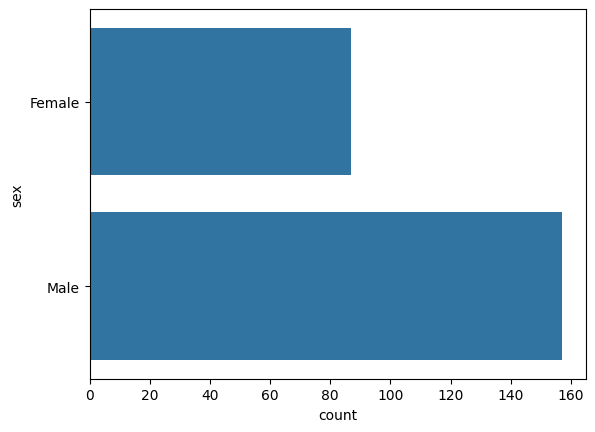

In [38]:
sb.countplot(dt['sex'])

<Axes: xlabel='count', ylabel='smoker'>

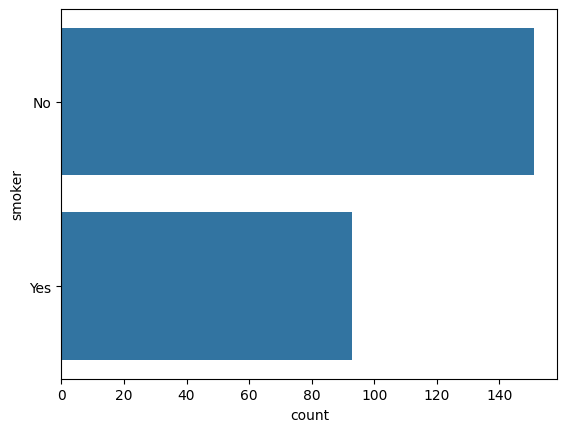

In [39]:
sb.countplot(dt['smoker'])

<Axes: xlabel='count', ylabel='day'>

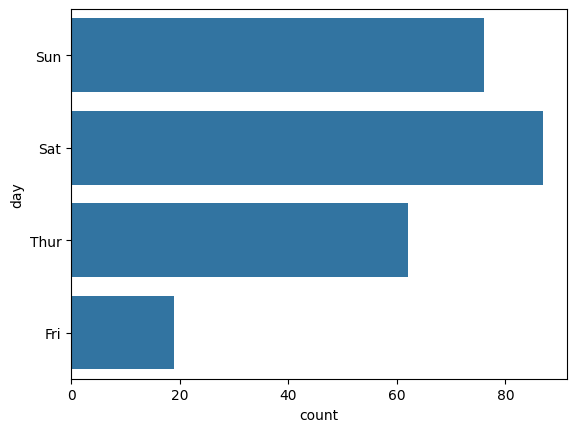

In [40]:
sb.countplot(dt['day'])

In [44]:
import matplotlib.pyplot as plt

In [82]:
dt_day = dt.groupby('day')['tip'].mean()
dt_day

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<BarContainer object of 4 artists>

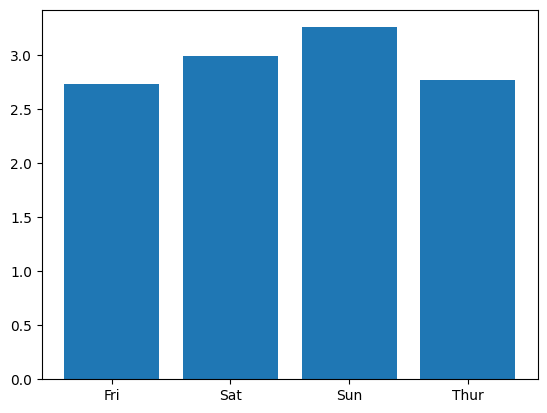

In [81]:
fig, ax = plt.subplots()

ax.bar(dt_day.index,dt_day.array)

In [83]:
dt_sex = dt.groupby('sex')['tip'].mean()
dt_sex

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

<BarContainer object of 2 artists>

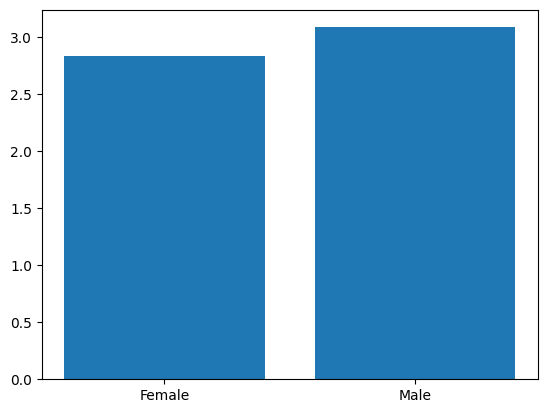

In [84]:
fig, ax = plt.subplots()

ax.bar(dt_sex.index,dt_sex.array)

In [110]:
dt_smoker = dt.loc[dt['smoker'] == 'Yes']
dt_smoker.groupby('day')['smoker'].count()

day
Fri     15
Sat     42
Sun     19
Thur    17
Name: smoker, dtype: int64

In [112]:
dt_smoker_not = dt.loc[dt['smoker'] == 'No']
dt_smoker_not.groupby('day')['smoker'].count()

day
Fri      4
Sat     45
Sun     57
Thur    45
Name: smoker, dtype: int64

In [118]:
dsmoker = dt.groupby(['day','smoker'])['day'].count().unstack('smoker')
dsmoker

smoker,No,Yes
day,,
Fri,4,15
Sat,45,42
Sun,57,19
Thur,45,17


<Axes: xlabel='day'>

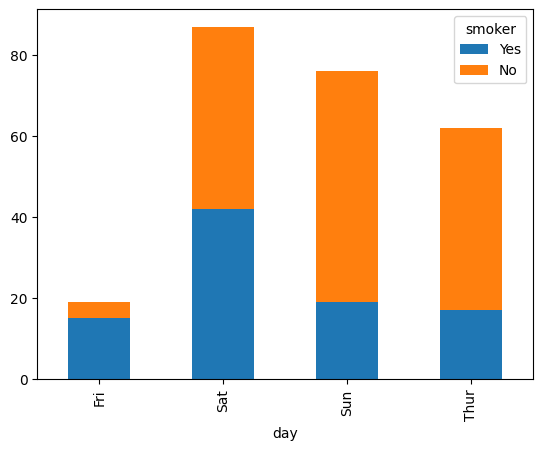

In [120]:
dsmoker[['Yes','No']].plot(stacked=True,kind='bar')

In [129]:
dt_sex_plot = dt[['tip','sex']]
dt_sex_plot = dt_sex_plot.sort_values('sex')
dt_sex_plot

,tip,sex
0,1.01,Female
139,2.75,Female
137,2.00,Female
136,2.00,Female
135,1.25,Female
...,...,...
43,1.32,Male
42,3.06,Male
41,2.54,Male
39,5.00,Male


<Axes: xlabel='sex', ylabel='tip'>

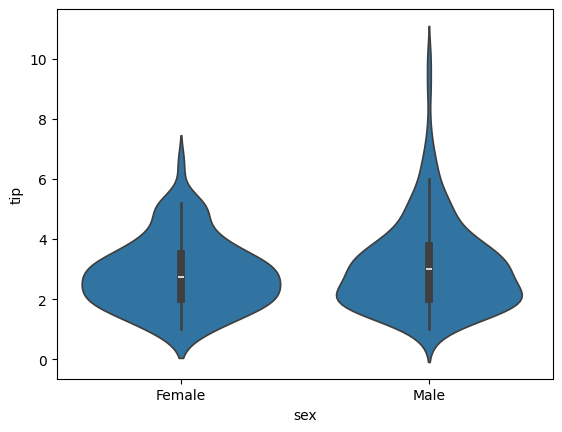

In [131]:
sb.violinplot(data=dt_sex_plot,x='sex',y='tip')